In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Add src to path to import custom modules
sys.path.append('../src')

print("✅ Setup complete")


✅ Setup complete


In [2]:
# Load train and test datasets
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print("="*60)
print("DATASET SHAPES")
print("="*60)
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")


DATASET SHAPES
Training set: (891, 12)
Test set: (418, 11)


In [3]:
print("\n" + "="*60)
print("FIRST 5 ROWS - TRAINING DATA")
print("="*60)
display(train_df.head())

print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
train_df.info()


FIRST 5 ROWS - TRAINING DATA


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("\n" + "="*60)
print("MISSING VALUES - TRAINING DATA")
print("="*60)
print(train_df.isnull().sum())

print("\n" + "="*60)
print("MISSING VALUES - TEST DATA")
print("="*60)
print(test_df.isnull().sum())



MISSING VALUES - TRAINING DATA
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

MISSING VALUES - TEST DATA
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
display(train_df.describe())


STATISTICAL SUMMARY


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


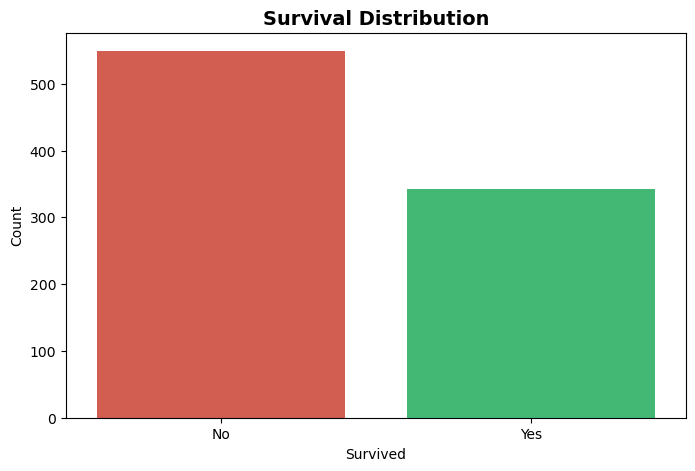

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df, hue='Survived', palette=['#e74c3c', '#2ecc71'], legend=False)
plt.title('Survival Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


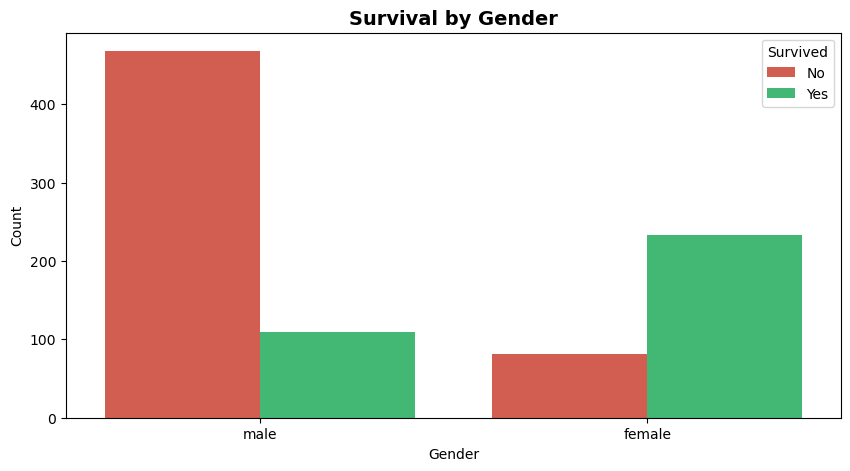

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

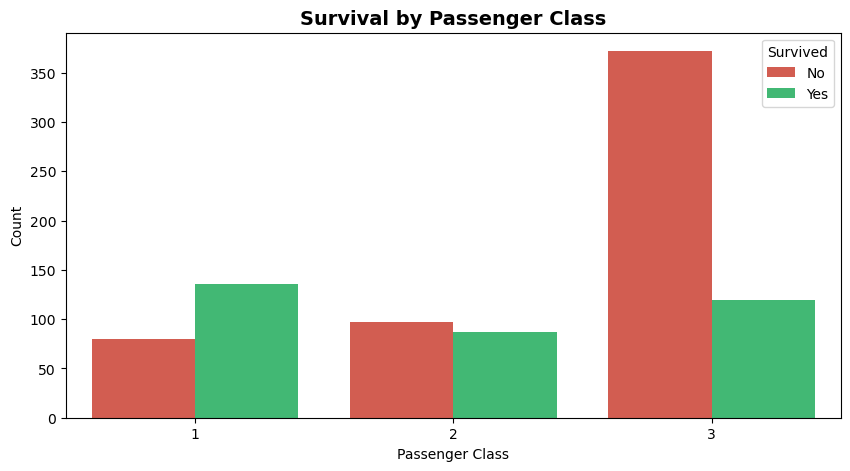

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [10]:
# Import preprocessing function
from preprocess import preprocess_data

print("="*60)
print("TESTING PREPROCESSING PIPELINE")
print("="*60)

# Note: This will only work AFTER you've run train.py at least once
# because it needs the saved encoders

try:
    # Preprocess training data (creates encoders)
    print("\n1. Preprocessing training data...")
    train_clean = preprocess_data(train_df.copy(), is_train=True, save_encoders=True)
    print(f"✅ Training data preprocessed: {train_clean.shape}")
    print(f"Features: {list(train_clean.columns)}")
    
    # Preprocess test data (uses saved encoders)
    print("\n2. Preprocessing test data...")
    test_clean = preprocess_data(test_df.copy(), is_train=False, save_encoders=False)
    print(f"✅ Test data preprocessed: {test_clean.shape}")
    print(f"Features: {list(test_clean.columns)}")
    
    print("\n3. Checking for missing values after preprocessing...")
    print(f"Training: {train_clean.isnull().sum().sum()} missing values")
    print(f"Test: {test_clean.isnull().sum().sum()} missing values")
    
    print("\n" + "="*60)
    print("PREPROCESSED DATA SAMPLE")
    print("="*60)
    display(train_clean.head())
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("\nMake sure you've run train.py first to create the encoders!")


TESTING PREPROCESSING PIPELINE

1. Preprocessing training data...
✅ Training data preprocessed: (891, 12)
Features: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'AgeBin', 'FareBin']

2. Preprocessing test data...
✅ Test data preprocessed: (418, 11)
Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'AgeBin', 'FareBin']

3. Checking for missing values after preprocessing...
Training: 0 missing values
Test: 0 missing values

PREPROCESSED DATA SAMPLE


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,AgeBin,FareBin
0,0,3,1,22.0,1,0,7.2500,2,2,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,3,2,3,3
2,1,3,0,26.0,0,0,7.9250,2,1,1,2,1
3,1,1,0,35.0,1,0,53.1000,2,3,2,2,3
4,0,3,1,35.0,0,0,8.0500,2,2,1,2,1


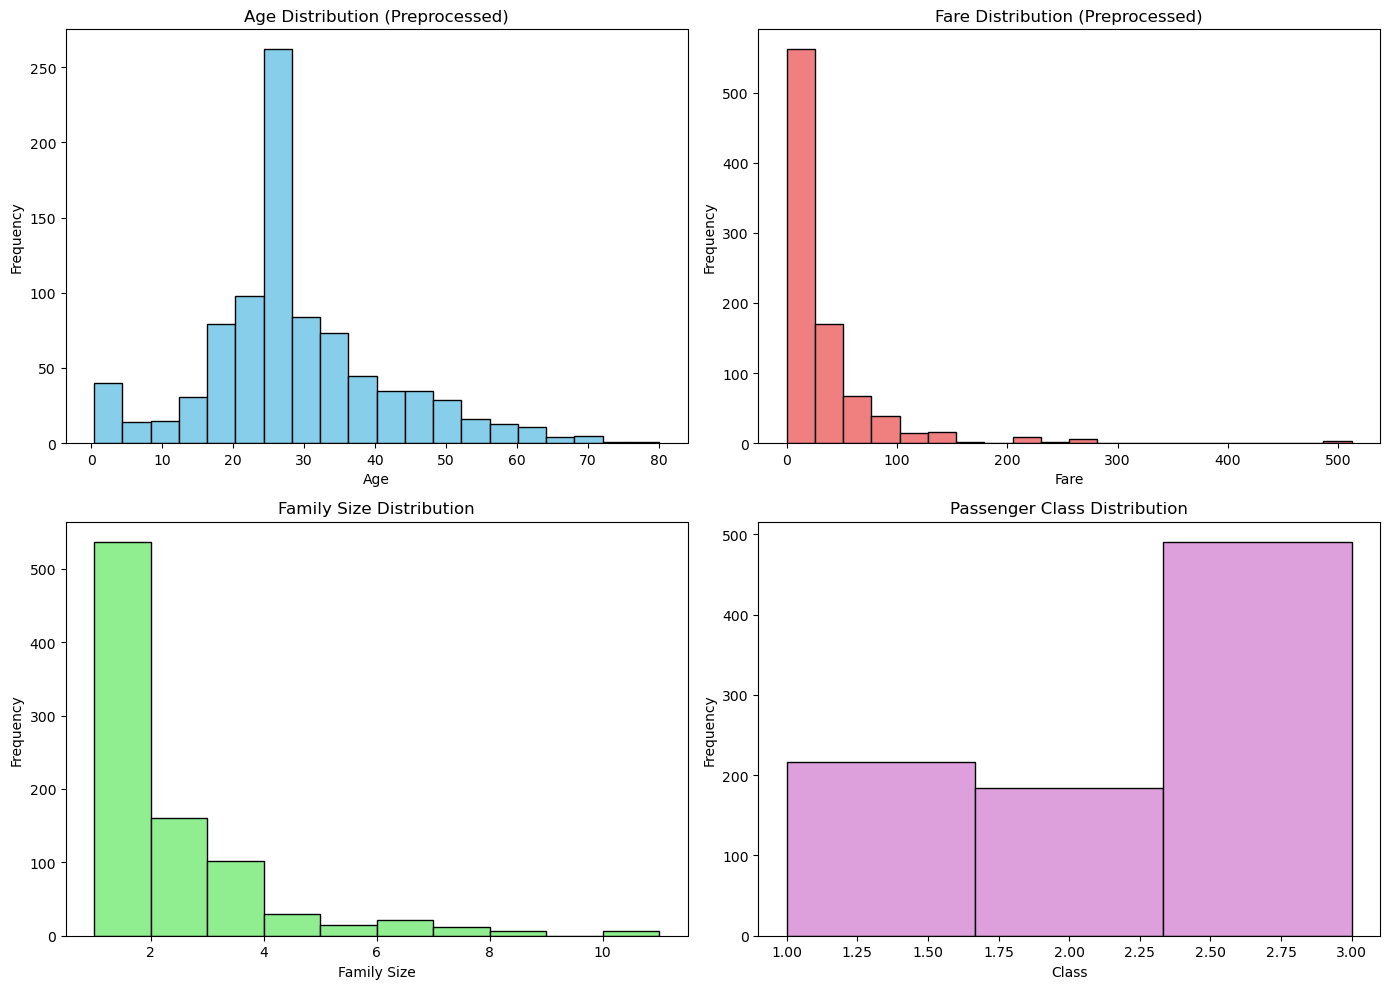

In [11]:
try:
    # Visualize preprocessed features
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Age distribution
    axes[0, 0].hist(train_clean['Age'], bins=20, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Age Distribution (Preprocessed)')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    
    # Plot 2: Fare distribution
    axes[0, 1].hist(train_clean['Fare'], bins=20, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Fare Distribution (Preprocessed)')
    axes[0, 1].set_xlabel('Fare')
    axes[0, 1].set_ylabel('Frequency')
    
    # Plot 3: Family Size distribution
    axes[1, 0].hist(train_clean['FamilySize'], bins=10, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Family Size Distribution')
    axes[1, 0].set_xlabel('Family Size')
    axes[1, 0].set_ylabel('Frequency')
    
    # Plot 4: Passenger Class distribution
    axes[1, 1].hist(train_clean['Pclass'], bins=3, color='plum', edgecolor='black')
    axes[1, 1].set_title('Passenger Class Distribution')
    axes[1, 1].set_xlabel('Class')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
except:
    print("Run preprocessing first to generate plots")



In [15]:
print("\n" + "="*60)
print("EXPLORATION SUMMARY")
print("="*60)
print(f"✅ Training samples: {len(train_df)}")
print(f"✅ Test samples: {len(test_df)}")
print(f"✅ Features in raw data: {train_df.shape[1]}")
try:
    print(f"✅ Features after preprocessing: {train_clean.shape[1]}")
    print(f"✅ All preprocessing tests passed!")
except:
    print(f"⚠️  Run train.py to test full preprocessing pipeline")
print("="*60)


EXPLORATION SUMMARY
✅ Training samples: 891
✅ Test samples: 418
✅ Features in raw data: 12
✅ Features after preprocessing: 12
✅ All preprocessing tests passed!
